## Summary of Data

The dataset used for this Netflix EDA project is a comprehensive collection of data related to movies and TV shows available on the Netflix streaming platform. It includes information such as title, release year, genre, duration, IMDb ratings, user reviews, and viewer demographics. with the help of this dataset we can conduct an in-depth analysis of content trends, user behavior, and sentiment.

`Dataset link:` https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data?select=netflix_titles_2021.csv 

### Attribute Information

- `show_id`     : unique id of each show (not much of a use for us in this notebook)
- `type`        : The category of a show, can be either a Movie or a TV Show
- `title`       : Name of the show
- `director`    : Name of the director(s) of the show
- `cast`        : Name of actors and other cast of the show
- `country`     : Name of countries the show is available to watch on Netflix
- `date_added`  : Date when the show was added on Netflix
- `release_year`: Release year of the show
- `rating`      : Show rating on netflix
- `duration`    : Time duration of the show
- `listed_in`   : Genre of the show
- `description` : Some text describing the show

### Rating Information

#### Children
- `TV-Y`  :Designed to be appropriate for all children
- `TV-Y7` :Suitable for ages 7 and up
- `G`     :Suitable for General Audiences
- `TV-G`  :Suitable for General Audiences
- `PG`    :Parental Guidance suggested
- `TV-PG` :Parental Guidance suggested

#### Teens
- `PG-13` :Parents strongly cautioned. May be Inappropriate for ages 12 and under.
- `TV-14` :Parents strongly cautioned. May not be suitable for ages 14 and under.

#### Adults
- `R`     :Restricted. May be inappropriate for ages 17 and under.
- `TV-MA` :For Mature Audiences. May not be suitable for ages 17 and under.
- `NC-17` :Inappropriate for ages 17 and under

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ANSHU\anaconda3\envs\GPU\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data.shape

(8807, 12)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Column Types:

- `Numerical:` Rating
- `Categorical:` 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description'

In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

`issue:` 
- Columns **director, cast, country, date_added, rating, duration** have missing values.
- column `date_added` is datetime data type but it is given obect data type.

### Data Cleaning

In [7]:
# Making a copy of our dataset
df = data.copy()

In [8]:
# Changing date_added column to datetime data type.
df["date_added"] = pd.to_datetime(df['date_added'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [10]:
# making 3 different column for date_added column that will contain year, month and day

df['added_year'] = df['date_added'].dt.year
df['added_day'] = df['date_added'].dt.day_name()
df['month_name']=df['date_added'].dt.month_name()

In [11]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_day,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Saturday,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Friday,September


In [12]:
df.drop(["date_added", "show_id", "description"], axis = 1, inplace=True)

In [13]:
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
added_year        10
added_day         10
month_name        10
dtype: int64

In [14]:
# Handling missing values
df["director"] = df["director"].fillna("Data Not Available")
df["cast"] = df["cast"].fillna("Data Not Available")
df["country"] = df["country"].fillna("Data Not Available")

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
added_year      0
added_day       0
month_name      0
dtype: int64

In [17]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,added_year,added_day,month_name
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Data Not Available,United States,2020,PG-13,90 min,Documentaries,2021.0,Saturday,September
1,TV Show,Blood & Water,Data Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,Friday,September
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Data Not Available,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,Friday,September
3,TV Show,Jailbirds New Orleans,Data Not Available,Data Not Available,Data Not Available,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,Friday,September
4,TV Show,Kota Factory,Data Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,Friday,September


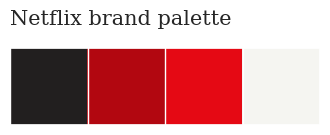

In [18]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
# sns.palplot(['Raisin Black','Mordant Red 19', 'KU Crimson', 'Cultured'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

## Content Analysis

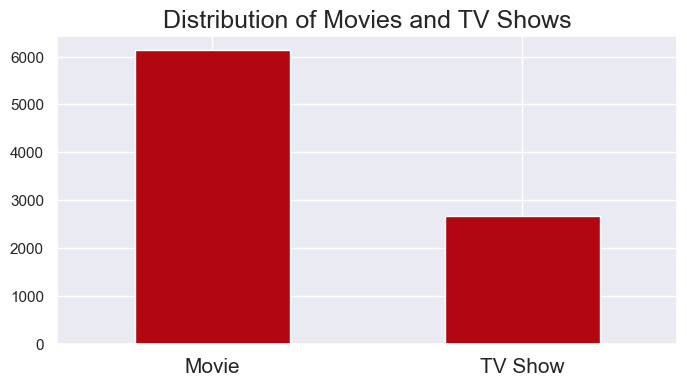

In [43]:
plt.figure(figsize = (8,4))
plt.title("Distribution of Movies and TV Shows", fontsize=18)
df["type"].value_counts().plot(kind="bar", color="#b20710")
plt.xticks(rotation=0, fontsize=15);

In [20]:
df["type"].value_counts(normalize=True)

Movie      0.696928
TV Show    0.303072
Name: type, dtype: float64

`Insight:` we can see that there are more number of Movies than TV Shows in Netflix.

In [21]:
## Let's Find Top 10 Genres in Netflix.

# Split the 'listed_in' column and create a new DataFrame
genres_df = data['listed_in'].str.split(', ', expand=True)

# Reshape the DataFrame to have one column for each genre
genres_stacked = genres_df.stack()

# Count the occurrences of each genre for movies and TV shows
genre_counts = genres_stacked.value_counts().head(10)

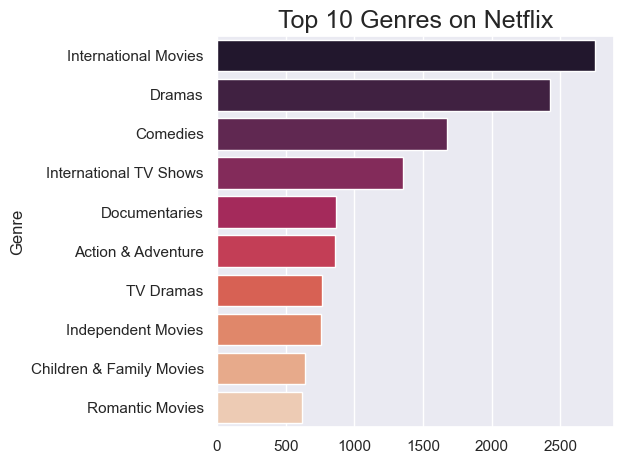

In [44]:
# Plot the genre counts
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="rocket")

# Add labels and title
plt.ylabel('Genre')
plt.title('Top 10 Genres on Netflix', fontsize = 18)

# Show the bar graph
plt.tight_layout()
plt.show()

`Insight:`  Here we can cleary see that **International Movies** is top genres that consist of more than 2500 Movies and TV Shows.

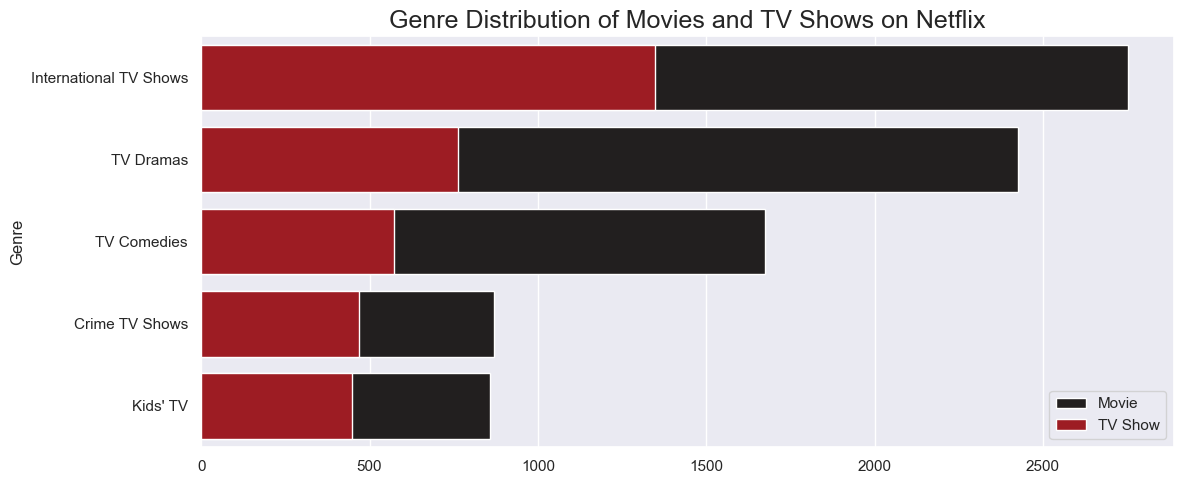

In [46]:

# Filter data for movies and TV shows
movies_data = df[df['type'] == 'Movie']
tv_shows_data = df[df['type'] == 'TV Show']

# Count genre occurrences for movies and TV shows separately
movie_genre_counts = movies_data['listed_in'].str.split(', ').explode().value_counts().head(5)
tv_show_genre_counts = tv_shows_data['listed_in'].str.split(', ').explode().value_counts().head(5)

# Create a horizontal bar plot for movies
plt.figure(figsize=(12, 5))
sns.barplot(y=movie_genre_counts.index, x=movie_genre_counts.values, palette=["#221f1f"], label='Movie')

# Create a horizontal bar plot for TV shows
sns.barplot(y=tv_show_genre_counts.index, x=tv_show_genre_counts.values, palette=["#b20710"], label='TV Show')

# Add labels and title
plt.ylabel('Genre')
plt.title('Genre Distribution of Movies and TV Shows on Netflix', fontsize=18)

# Add legend
plt.legend()

# Show the bar plot
plt.tight_layout()
plt.show()


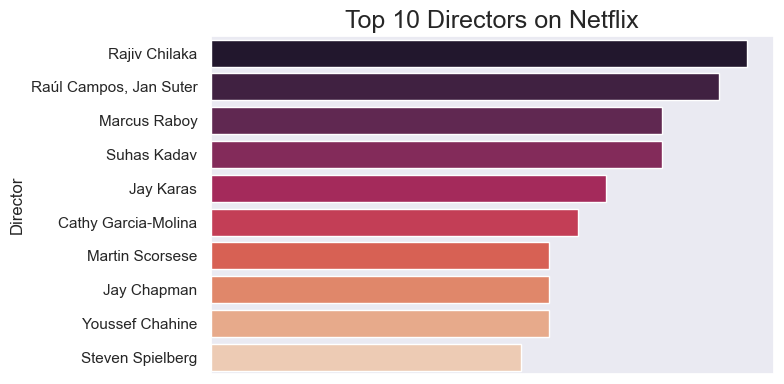

In [47]:
# Get the top 10 directors by counting their occurrences (excluding "Data Not Available")
top_directors = df["director"][df["director"] != "Data Not Available"].value_counts().head(10)

# Set up the plot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')

# Add labels and title
plt.ylabel('Directors')
plt.title('Top 10 Directors on Netflix', fontsize=18)

# Remove data labels from the x-axis
plt.xticks([])

# Show the plot
plt.tight_layout()
plt.show()


`Insight:` **Rajiv Chilaka** is the Top director in Netflix.

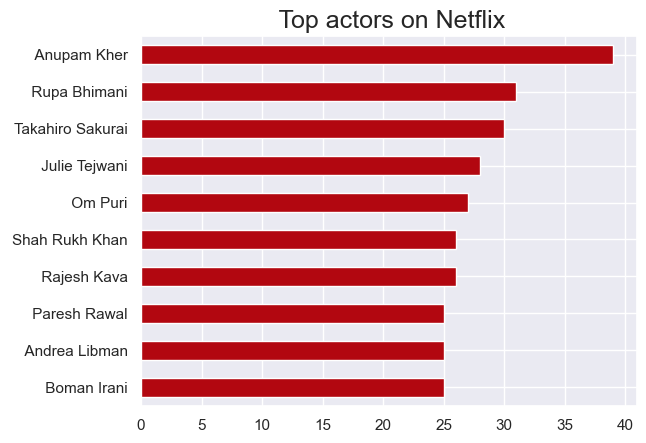

In [49]:
# Split the 'listed_in' column and create a new DataFrame
# genres_df = data['listed_in'].str.split(', ', expand=True)
cast_df = df["cast"].str.split(',', expand=True)

# Reshape the DataFrame to have one column for each genre
cast_stacked = cast_df.stack()

# Count the occurrences of each genre for movies and TV shows
cast_count = cast_stacked[cast_stacked != 'Data Not Available'].value_counts().head(10).sort_values()

cast_count.plot(kind='barh', color='#b20710')
plt.title(" Top actors on Netflix", fontsize=18)
plt.show()

`Indight:` **Anupam Kher** is in the first position in netflix with 39 Movies and TV shows

## Regional Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


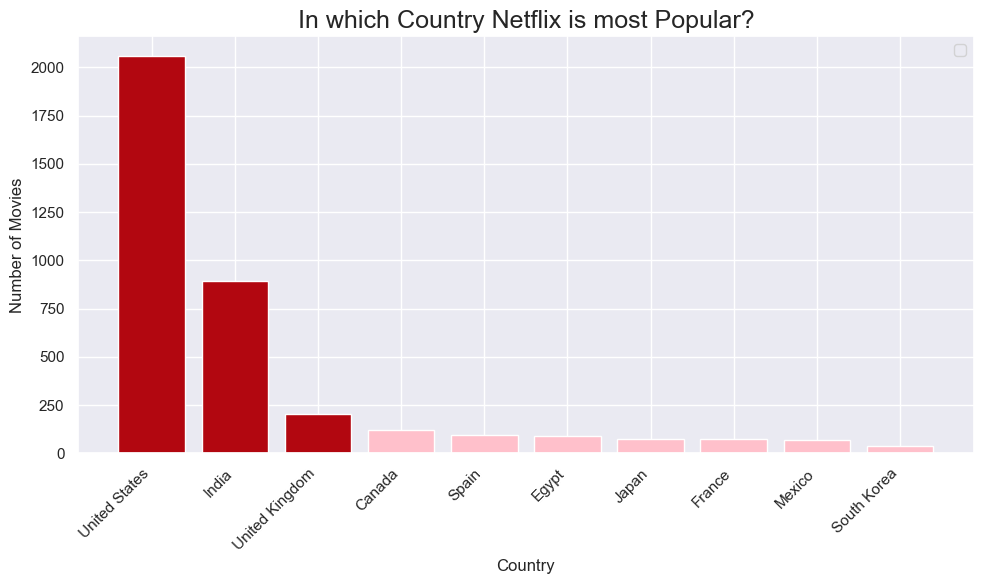

In [50]:
# Group the data by country and content type, and count the occurrences
country_content_counts = data.groupby(['country', 'type']).size().unstack(fill_value=0)

country_content_counts['Total'] = country_content_counts.sum(axis=1)
sorted_countries = country_content_counts.sort_values(by='Total', ascending=False).head(10)


top_countries = sorted_countries.head(3)
other_countries = sorted_countries.iloc[3:].sort_values(by='Movie', ascending=False)

plt.figure(figsize=(10, 6))

# Plot top 3 countries in one color
plt.bar(top_countries.index, top_countries['Movie'], color='#b20710')

# Plot other 7 countries in another color
plt.bar(other_countries.index, other_countries['Movie'], color='pink')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('In which Country Netflix is most Popular?', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show the bar graph
plt.tight_layout()
plt.show()


`Insight:` **United States, India** and **United Kingdom** are the Top three countries where maximum number of movie is released in Netflix.

In [27]:
rating_to_category = {
    'TV-PG': 'Kids',
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'PG': 'Kids',
    'TV-G': 'Kids',
    
    'TV-14': 'Teens',
    'PG-13': 'Teens',
        
    'NR': 'Adults',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df["rating"] = df["rating"].replace(rating_to_category)

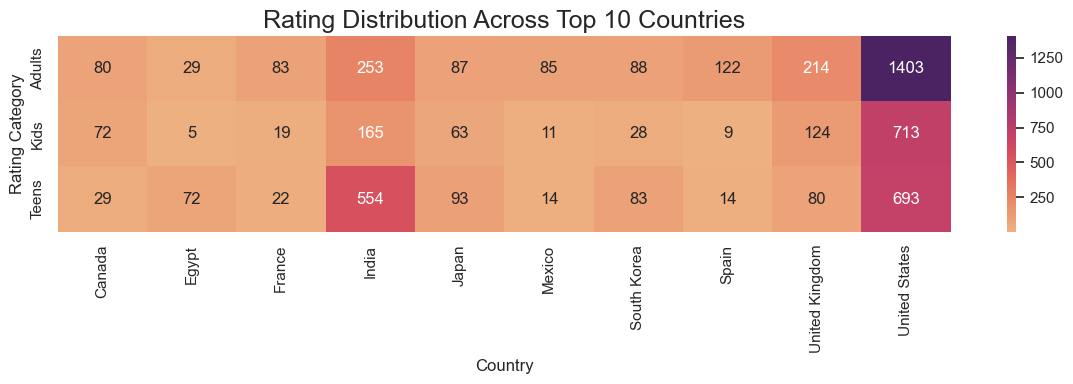

In [51]:
# Get the top 10 countries
df1= df[df["country"] != "Data Not Available"]
top_10_countries = df1["country"].value_counts().head(10).index

# Filter data for the top 10 countries
df_top_10_countries = df1[df1["country"].isin(top_10_countries)]

# Create a cross-tabulation between rating and country
rating_country_cross = pd.crosstab(index=df_top_10_countries["rating"], columns=df_top_10_countries["country"])

# Set the figure size
plt.figure(figsize=(12, 4))

# Create a heatmap using Seaborn
sns.heatmap(rating_country_cross, cmap="flare", annot=True, fmt='d')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Rating Category')
plt.title('Rating Distribution Across Top 10 Countries', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()

`Insght:` In **India** Content related to teens are most popular whereas in **United States** and **UK** adult rating Content are most Popular.

## Content Release and Viewer Engagement Analysis

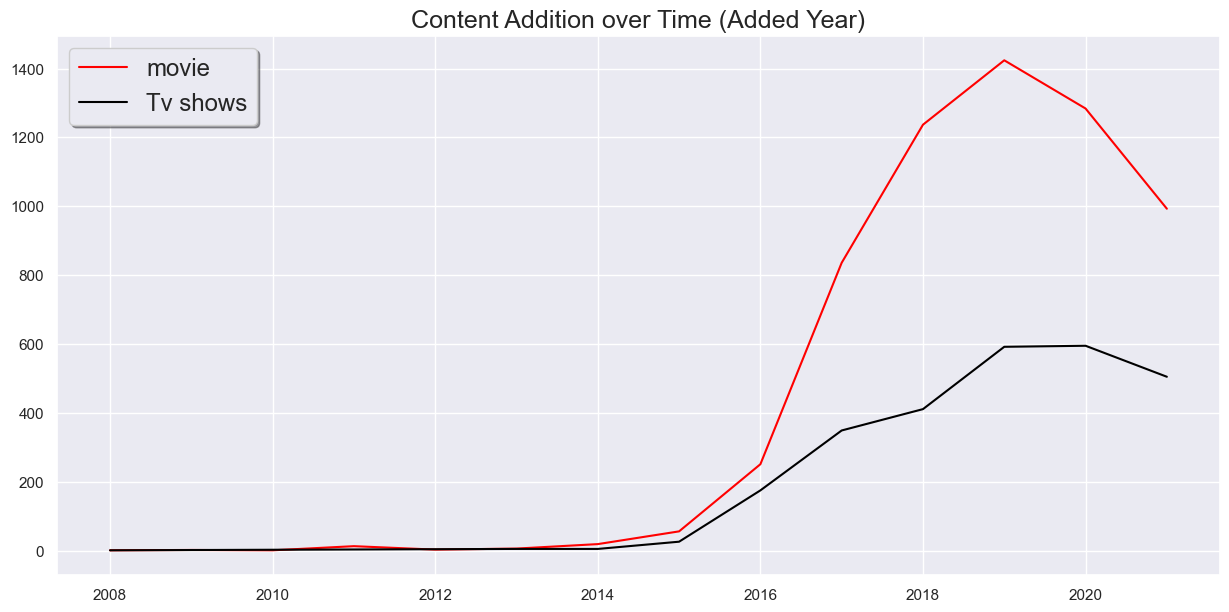

In [52]:
# Content addition in Netflix.

movie = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]

movie_added_total = movie["added_year"].value_counts()
tv_shows_added_total = tv_shows["added_year"].value_counts()

plt.figure(figsize=(15,7))
sns.lineplot(x=movie_added_total.index, y=movie_added_total.values, color="Red", label="movie")
sns.lineplot(x=tv_shows_added_total.index, y=tv_shows_added_total.values, color="black", label="Tv shows")
plt.legend(fontsize='x-large', shadow = 1)
plt.title("Content Addition over Time (Added Year)", fontsize=18)
plt.show()

`Insights:`
- After 2015, More movies are released in comparosion to TV Shows in Nextflix.
- After 2020, we can see a decrease in movies that are released in Netflix.

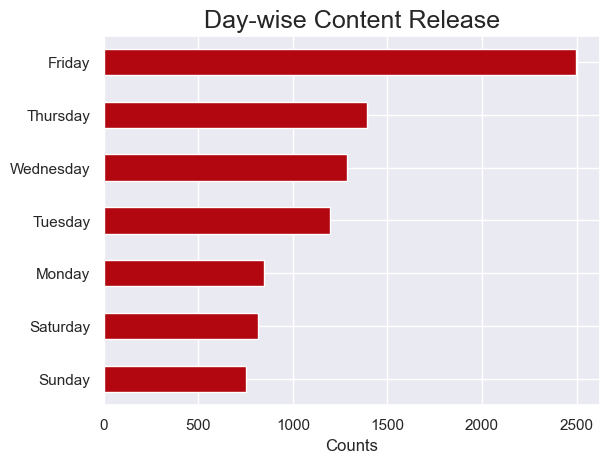

In [53]:
# On which day most content is added on Netflix?
weekday = df["added_day"]
weekday = weekday.value_counts().sort_values()

weekday.plot(kind="barh", color="#b20710")
plt.title('Day-wise Content Release', fontsize=18)
plt.xlabel('Counts')
plt.show()

`Insight:` Most Contents are released on **Friday**.

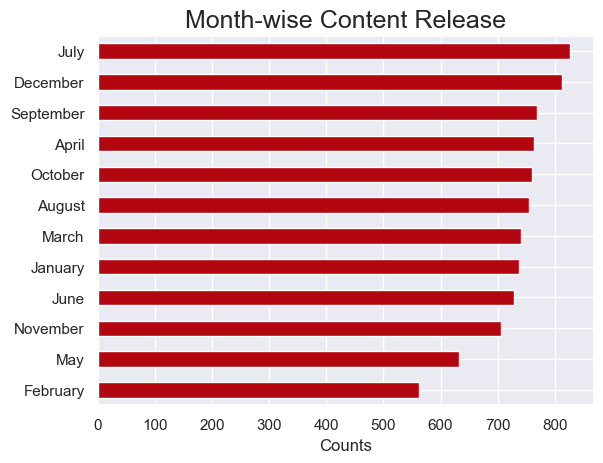

In [54]:
# On which month most content is added on Netflix?
month = df["month_name"].value_counts().sort_values()
month.plot(kind = "barh", color="#b20710")
plt.title('Month-wise Content Release', fontsize=18)
plt.xlabel('Counts')
plt.show()

`Insight:` In the month of **July** most contents are released.

## User Behaviour Analysis

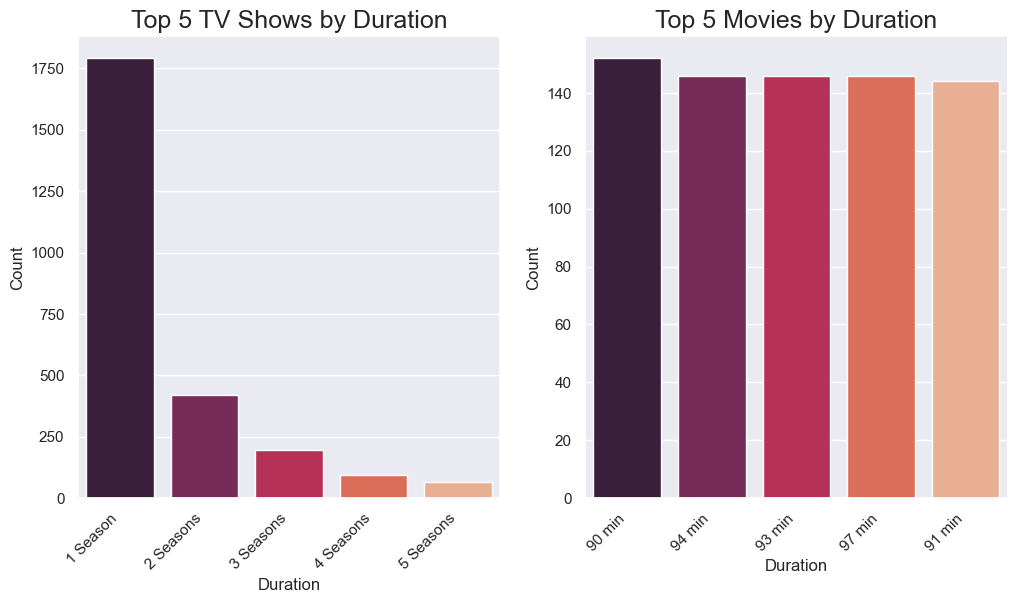

In [55]:
# Get the top 5 TV show and movie durations
tv_shows_count = df["duration"][df["type"] == "TV Show"].value_counts().head(5)
movies_count = df["duration"][df["type"] == "Movie"].value_counts().head(5)

# Set up the subplot using Seaborn
plt.figure(figsize=(12, 6))

# Create the subplot for TV show durations
plt.subplot(1, 2, 1)
sns.barplot(x=tv_shows_count.index, y=tv_shows_count.values, palette="rocket")
plt.title('Top 5 TV Shows by Duration', fontsize=18)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Create the subplot for movie durations
plt.subplot(1, 2, 2)
sns.barplot(x=movies_count.index, y=movies_count.values, palette="rocket")
plt.title('Top 5 Movies by Duration', fontsize=18)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

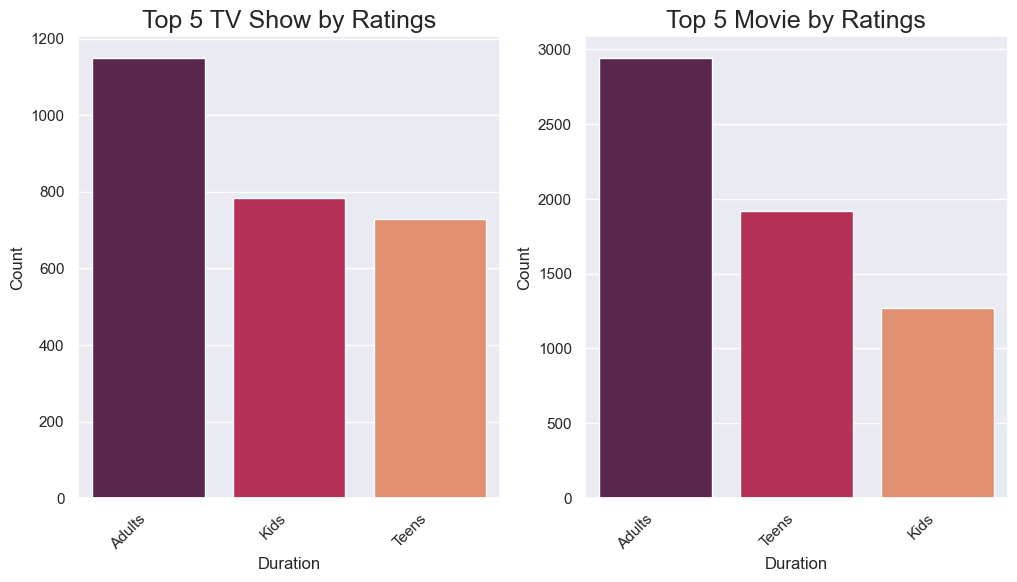

In [56]:
# Get the top 5 TV show and movie w.r.t Ratings
tv_shows_rating_count = df["rating"][df["type"] == "TV Show"].value_counts().head(5)
movies_rating_count = df["rating"][df["type"] == "Movie"].value_counts().head(5)

# Set up the subplot using Seaborn
plt.figure(figsize=(12, 6))

# Create the subplot for TV show durations
plt.subplot(1, 2, 1)
sns.barplot(x=tv_shows_rating_count.index, y=tv_shows_rating_count.values, palette="rocket")
plt.title('Top 5 TV Show by Ratings', fontsize=18)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Create the subplot for movie durations
plt.subplot(1, 2, 2)
sns.barplot(x=movies_rating_count.index, y=movies_rating_count.values, palette="rocket")
plt.title('Top 5 Movie by Ratings', fontsize=18)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

`Insight:` Both Movies and TV Shows have highest adult rating content in Netflix.